<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/DataStructuresAndAlgorithms/Aula%2001%20-%20Intro%2C%20Sorting%20Methods%20and%20Recursion/DataStructres_Lecture_01_Sort_and_Recursion_LectureNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Searching Algorithms

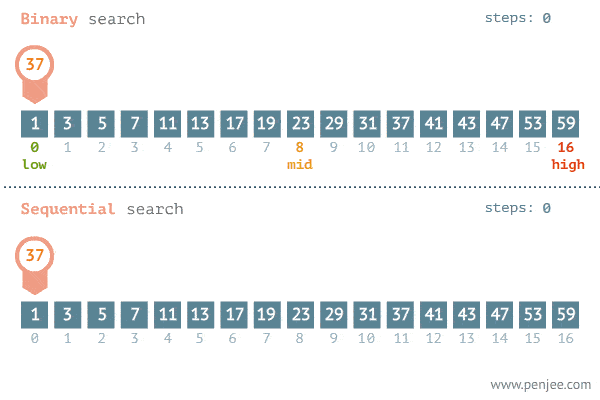

In [1]:
def sequential_search(arr, target):
    steps = 0
    for i, value in enumerate(arr):
        steps += 1
        if value == target:
            return i, steps
    return -1, steps


def binary_search(arr, target):
    steps = 0
    left, right = 0, len(arr) - 1

    while left <= right:
        steps += 1
        mid = (left + right) // 2

        if arr[mid] == target:
            return mid, steps
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return -1, steps

In [2]:
#Sorted
arr = [1,3, 5, 7, 11, 13, 17, 19, 23 , 29, 31, 37, 41, 43, 47, 53, 59]
print(sequential_search(arr, 37))
print(binary_search(arr, 37))

(11, 12)
(11, 4)


In [3]:
#NON-EXISTENT ELEMENT
print(sequential_search(arr, 15))
print(binary_search(arr, 15))

(-1, 17)
(-1, 4)


In [4]:
#unsorted
arr = [53, 7, 41, 1, 29, 17, 59, 3, 43, 11, 23, 47, 5, 31, 13, 37, 19]
print(sequential_search(arr, 37))
print(binary_search(arr, 37))

(15, 16)
(-1, 4)


Evaluate the searches with larger arrays, measuring execution time and number of steps (comparisons).

###Sequential Search

(1000,)
Final length: 100000
Final time: 0.01763926600006016
Final steps: 100000


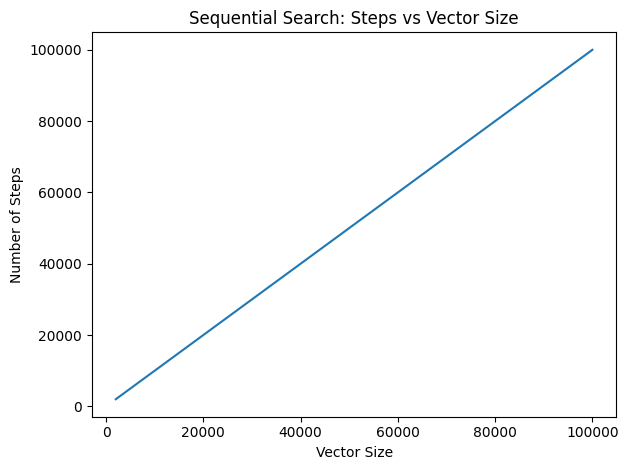

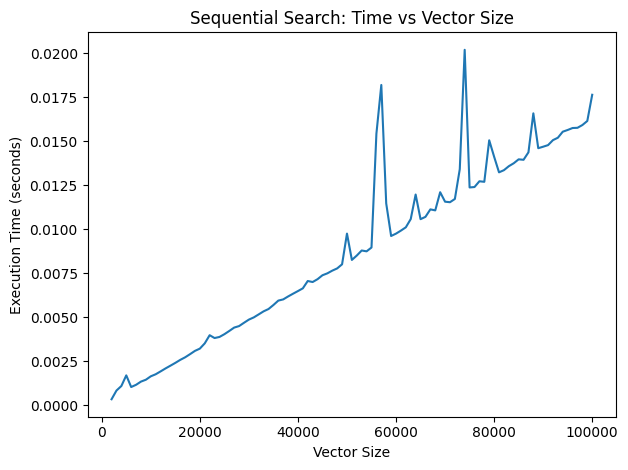

In [11]:
#Teste com arrays maiores
import numpy as np
import time
import matplotlib.pyplot as plt

# initial random vector with 1000 elements
v = np.random.rand(1000)
print(v.shape)

time_list_seq = []
step_list_seq = []
size_list_seq = []

while v.shape[0] < 100000:
    new_block = np.random.rand(1000)
    v = np.concatenate([v, new_block])

    last_elem = v[-1]  # worst-case for sequential search

    t0 = time.perf_counter()
    idx, steps = sequential_search(v, last_elem)
    t1 = time.perf_counter()

    time_list_seq.append(t1 - t0)
    step_list_seq.append(steps)
    size_list_seq.append(v.shape[0])

print("Final length:", v.shape[0])
print("Final time:", time_list_seq[-1])
print("Final steps:", step_list_seq[-1])

# Plot 1: steps vs vector size
plt.figure()
plt.plot(size_list_seq, step_list_seq)
plt.xlabel("Vector Size")
plt.ylabel("Number of Steps")
plt.title("Sequential Search: Steps vs Vector Size")
plt.tight_layout()
plt.show()

# Plot 2: time vs vector size
plt.figure()
plt.plot(size_list_seq, time_list_seq)
plt.xlabel("Vector Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Sequential Search: Time vs Vector Size")
plt.tight_layout()
plt.show()

###Binary Search

Final size: 100000
Final sorting time: 0.0014055360002203088
Final binary search time: 9.661000149208121e-06
Final binary search steps: 17


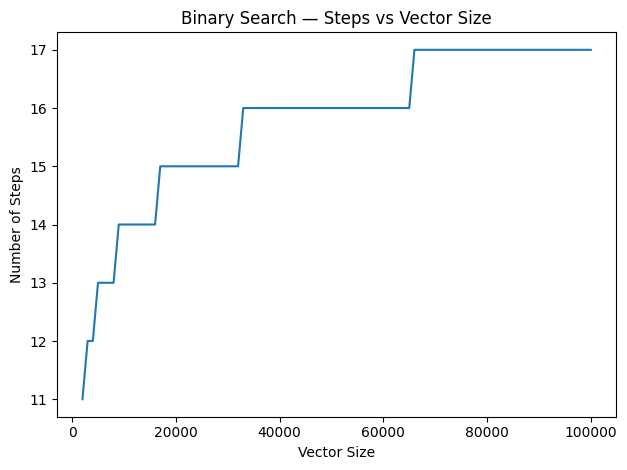

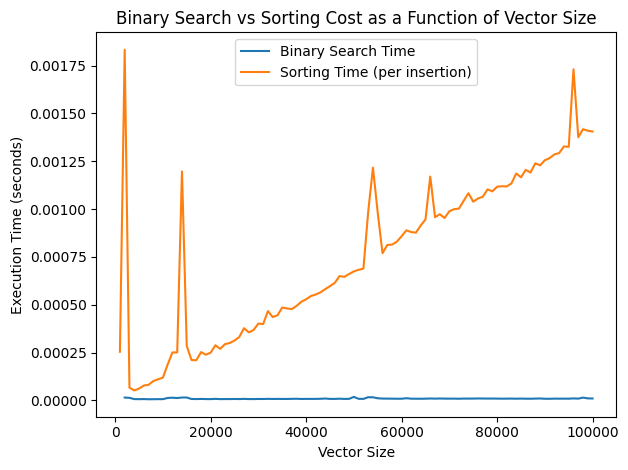

In [8]:
# initial random vector with 1000 elements
# initial random vector
v_bin = np.random.rand(1000)

# initial sort timing
t0_bin = time.perf_counter()
v_bin = np.sort(v_bin)
t1_bin = time.perf_counter()

size_list_bin = [v_bin.shape[0]]
sort_time_list_bin = [t1_bin - t0_bin]
search_time_list_bin = []
step_list_bin = []

while v_bin.shape[0] < 100000:
    new_block_bin = np.random.rand(1000)
    v_bin = np.concatenate([v_bin, new_block_bin])

    # sort timing
    t0_bin = time.perf_counter()
    v_bin = np.sort(v_bin)
    t1_bin = time.perf_counter()
    sort_time_list_bin.append(t1_bin - t0_bin)

    # binary search timing
    target_bin = v_bin[-1]
    t0_bin = time.perf_counter()
    idx_bin, steps_bin = binary_search(v_bin, target_bin)
    t1_bin = time.perf_counter()

    search_time_list_bin.append(t1_bin - t0_bin)
    step_list_bin.append(steps_bin)
    size_list_bin.append(v_bin.shape[0])

print("Final size:", v_bin.shape[0])
print("Final sorting time:", sort_time_list_bin[-1])
print("Final binary search time:", search_time_list_bin[-1])
print("Final binary search steps:", step_list_bin[-1])


# Plot 1 — Steps vs Vector Size (Binary Search)
plt.figure()
plt.plot(size_list_bin[1:], step_list_bin)
plt.xlabel("Vector Size")
plt.ylabel("Number of Steps")
plt.title("Binary Search — Steps vs Vector Size")
plt.tight_layout()
plt.show()


# Plot 2 — Binary Search Time vs Sorting Time
plt.figure()

plt.plot(size_list_bin[1:], search_time_list_bin, label="Binary Search Time")
plt.plot(size_list_bin, sort_time_list_bin, label="Sorting Time (per insertion)")

plt.xlabel("Vector Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Binary Search vs Sorting Cost as a Function of Vector Size")

plt.legend()
plt.tight_layout()
plt.show()

### Plot All

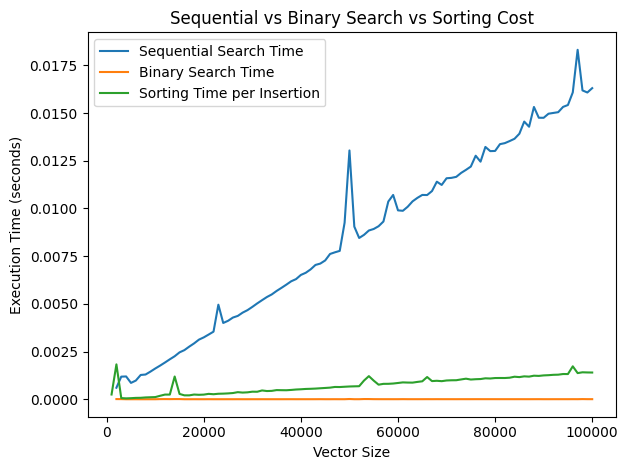

In [9]:
plt.figure()

plt.plot(size_list_seq, time_list_seq, label="Sequential Search Time")
plt.plot(size_list_bin[1:], search_time_list_bin, label="Binary Search Time")
plt.plot(size_list_bin, sort_time_list_bin, label="Sorting Time per Insertion")

plt.xlabel("Vector Size")
plt.ylabel("Execution Time (seconds)")
plt.title("Sequential vs Binary Search vs Sorting Cost")
plt.legend()
plt.tight_layout()
plt.show()

# Sorting Algorithms
  * Bubble Sort
  * Insertion Sort
  * Selection Sort
  * Performance Evaluation

IMAGES CREDITS: https://www.lavivienpost.net/

## Bubble Sort

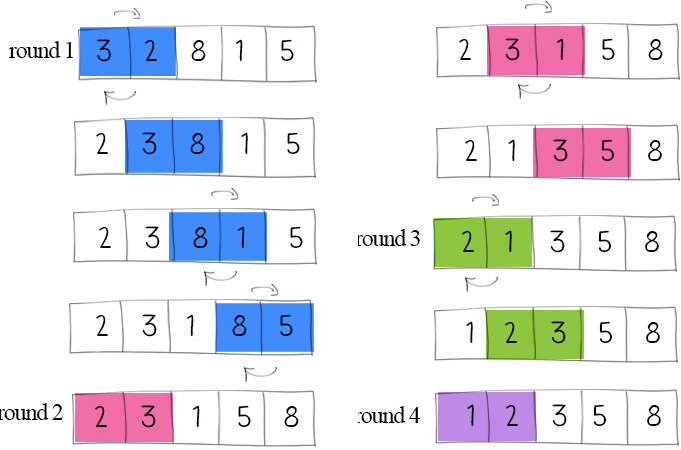

Repeatedly traverses the array, swapping adjacent elements to order the values in ascending or descending sequence until no more swaps are needed.

In [19]:
import numpy as np
import time

def bubble_sort(arr):
    n = len(arr)
    swap_count = 0
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
                swap_count += 1
        if not swapped:
            break
    return arr, swap_count

# Gerar vetor aleatório
np.random.seed(42)  # para reprodutibilidade
arr = np.random.randint(0, 1000, size=10000)
print(arr.shape)
# Medir tempo de execução
start_time = time.time()
sorted_arr, swaps = bubble_sort(arr.copy())
end_time = time.time()

print(f"Número de swaps: {swaps}")
print(f"Tempo de execução: {end_time - start_time:.6f} segundos")

## Selection Sort

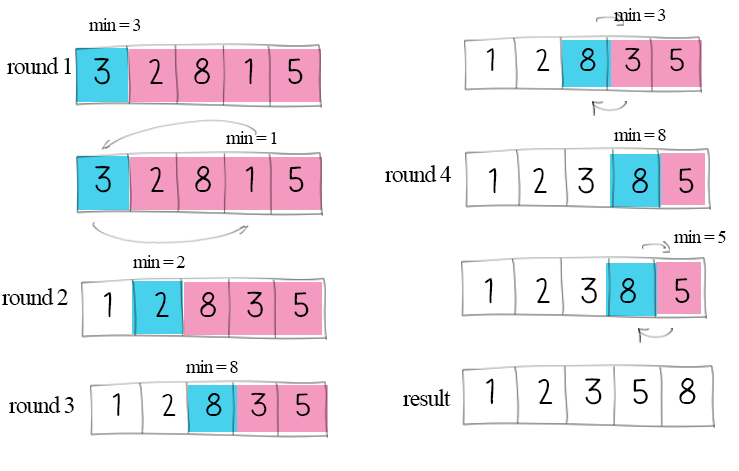

Iteratively traverses the array, selecting in each iteration the smallest (or largest, for descending order) element from the unsorted sublist and swapping it with the element at the starting position of that sublist, thereby progressively sorting the array until all elements are correctly positioned.

Now it is up to you !

In [16]:
def selection_sort(arr):
  n = len(arr)
  swap_count = 0
  shift_count = 0
  step_count = 0
  for i in range(n):
    min_idx = i
    for j in range(i + 1, n):
        step_count += 1
        if arr[j] < arr[min_idx]:
            min_idx = j
    if min_idx != i:
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
        swap_count += 1
  return swap_count, shift_count, step_count

## Insertion Sort

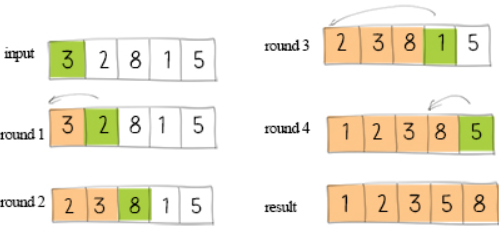


Iteratively traverses the array starting from the second element, comparing it with preceding elements and shifting them to the right until the correct position to insert the current element is found, thus ensuring the incremental (ascending or descending) sorting of the array until all elements are ordered.

Now it is up to you !

In [17]:
def insertion_sort(arr):
  n = len(arr)
  swap_count = 0
  shift_count = 0
  step_count = 0
  for i in range(1, n):
      key = arr[i]
      j = i - 1
      while j >= 0:
          step_count += 1
          if arr[j] > key:
              arr[j + 1] = arr[j]  # desloca
              shift_count += 1
              j -= 1
          else:
              break
      arr[j + 1] = key
  return swap_count, shift_count, step_count

In [20]:
import numpy as np
import time

#Bubble sort with metrics: swap_count, shift_count, step_count
def bubble_sort(arr):
    n = len(arr)
    swap_count = 0
    shift_count = 0  # não usado
    step_count = 0
    for i in range(n):
        swapped = False
        for j in range(n - i - 1):
            step_count += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swap_count += 1
                swapped = True
        if not swapped:
            break
    return swap_count, shift_count, step_count

## Evaluation of Sorting Algorithms
  * Metrics:
    * Execution Time
    * Number of Key Operations (e.g., swaps)

  * Test Setup:
    * Five distinct input sizes to analyze scalability and performance

In [21]:
import numpy as np
import time
import matplotlib.pyplot as plt


sizes = [100, 200, 300, 400, 500]
algorithms = [
    ('Bubble Sort', bubble_sort),
    ('Insertion Sort', insertion_sort),
    ('Selection Sort', selection_sort)
]

results = {
    "times": {name: [] for name, _ in algorithms},
    "steps": {name: [] for name, _ in algorithms},
    "swaps": {name: [] for name, _ in algorithms},
    "shifts": {name: [] for name, _ in algorithms},
    "mem_moves": {name: [] for name, _ in algorithms}
}

base_arrays = {size: np.random.randint(0, 10000, size) for size in sizes}

for name, func in algorithms:
    print(f"\n{name}:")
    for size in sizes:
        arr_copy = base_arrays[size].copy()
        start = time.time()
        swap_count, shift_count, step_count = func(arr_copy)
        end = time.time()

        results["times"][name].append(end - start)
        results["steps"][name].append(step_count)
        results["swaps"][name].append(swap_count)
        results["shifts"][name].append(shift_count)

        #Shift == 1 memory move | Swap == 2 memory moves
        results["mem_moves"][name].append(swap_count * 2 + shift_count)

        print(
            f"Size {size:6d} | Swaps: {swap_count:6d} | Shifts: {shift_count:6d} "
            f"| Steps: {step_count:6d} | MemMoves: {swap_count * 2 + shift_count:3d} "
            f"| Time: {end - start:.4f} s "
            f"| {base_arrays[size][:5]} -> {arr_copy[:5]}"
        )


Bubble Sort:
Size    100 | Swaps:   2514 | Shifts:      0 | Steps:   4650 | MemMoves: 5028 | Time: 0.0028 s | [2892 5534 3306 2902 3718] -> [ 21 191 391 462 667]
Size    200 | Swaps:   9931 | Shifts:      0 | Steps:  19575 | MemMoves: 19862 | Time: 0.0108 s | [8593  974  223 4613 6777] -> [ 28  91 132 223 225]
Size    300 | Swaps:  21935 | Shifts:      0 | Steps:  44660 | MemMoves: 43870 | Time: 0.0253 s | [1755  519 5463 7233 1102] -> [ 22  55  56 104 105]
Size    400 | Swaps:  42617 | Shifts:      0 | Steps:  79772 | MemMoves: 85234 | Time: 0.0433 s | [3401 3185 5285 9354 6772] -> [ 2 10 12 32 76]
Size    500 | Swaps:  61796 | Shifts:      0 | Steps: 124285 | MemMoves: 123592 | Time: 0.0660 s | [ 481 4287 6802 8298 4477] -> [37 45 66 71 80]

Insertion Sort:
Size    100 | Swaps:      0 | Shifts:   2514 | Steps:   2612 | MemMoves: 2514 | Time: 0.0012 s | [2892 5534 3306 2902 3718] -> [ 21 191 391 462 667]
Size    200 | Swaps:      0 | Shifts:   9931 | Steps:  10126 | MemMoves: 9931 | 

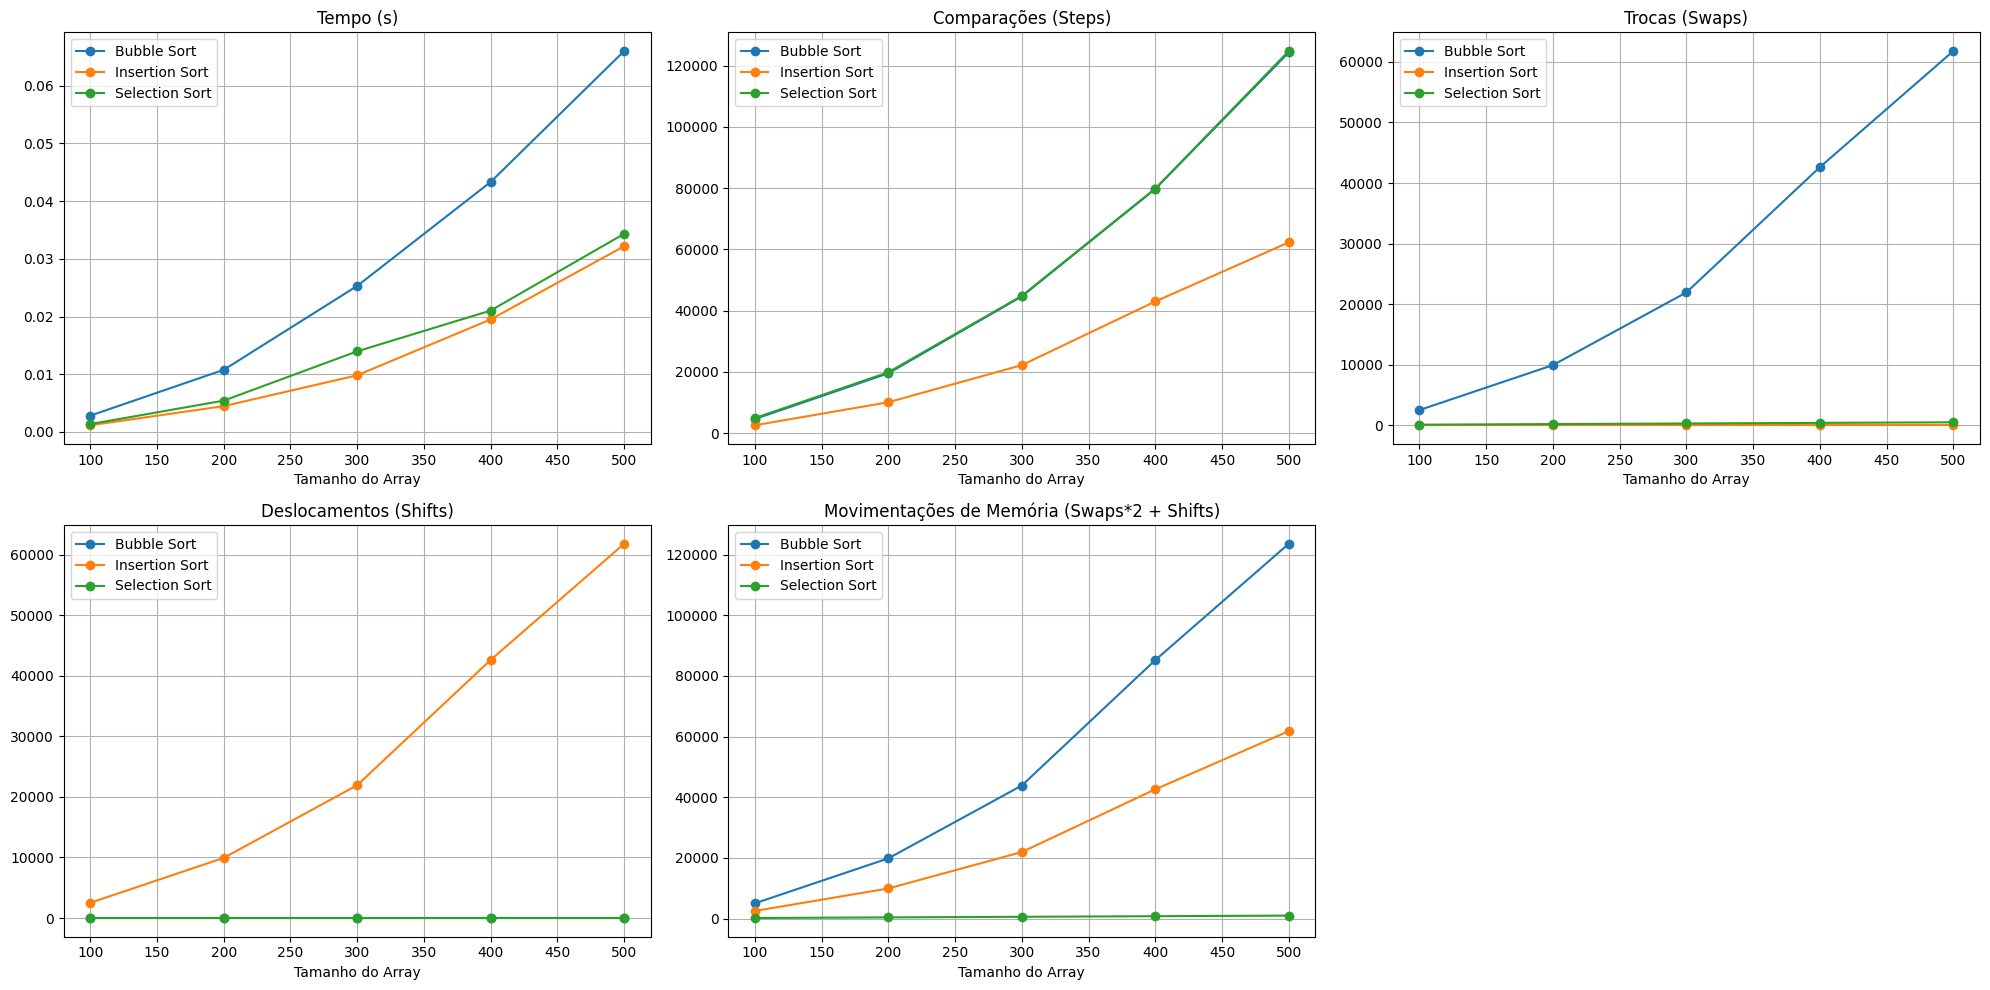

In [22]:
def plot_analysis(sizes, results, log_scale=False):
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))

    metricas = [
        ("Tempo (s)", results["times"]),
        ("Comparações (Steps)", results["steps"]),
        ("Trocas (Swaps)", results["swaps"]),
        ("Deslocamentos (Shifts)", results["shifts"]),
        ("Movimentações de Memória (Swaps*2 + Shifts)", results["mem_moves"])
    ]

    for idx, (titulo, dados) in enumerate(metricas):
        ax = axes[idx // 3, idx % 3]
        for name in dados:
            ax.plot(sizes, dados[name], marker='o', label=name)
        ax.set_title(titulo)
        ax.set_xlabel("Tamanho do Array")
        if log_scale:
            ax.set_yscale("log")
        ax.grid(True)
        ax.legend()

    axes[1, 2].axis("off")
    plt.tight_layout()
    plt.show()

plot_analysis(sizes, results)

# Recursion

Recursion is a computational method where a function solves a problem by calling itself with modified parameters, breaking the original problem into smaller subproblems of the same type, and combining their solutions. This process continues until a base case (termination condition) is reached, preventing infinite recursion.

Recursion is widely used in algorithms involving divide-and-conquer strategies, tree traversals, and mathematical computations such as factorial or Fibonacci sequences.

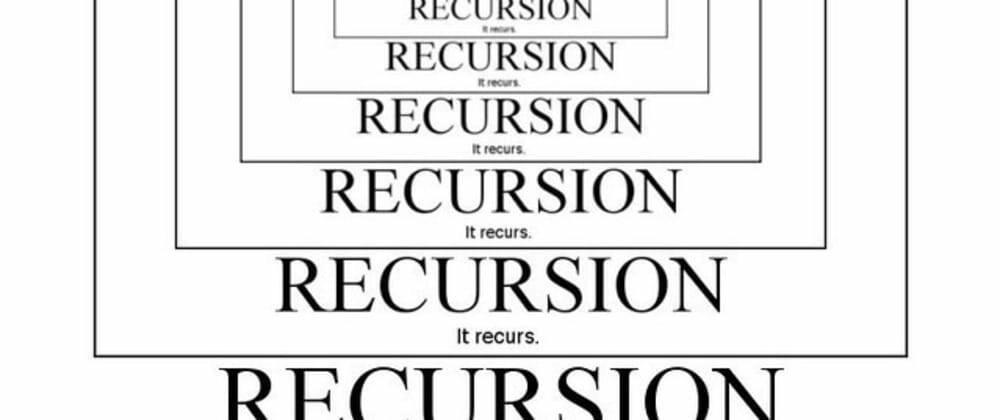

In [ ]:
def recursive_print(i):
    if i <= 0:       # base case
        return

    print(i)         # print current value

    recursive_print(i - 1)  # recursive call

    return

# Initial call to the recursive function
recursive_print(5)


## Recursive Sum

##Recursive Fibonacci